In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load Dataset
data = pd.read_csv('winequality-red.csv')  # Change path if needed
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Step 2: Feature and Target Split
X = data.drop('quality', axis=1)
y = data['quality']

In [6]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# Step 5: Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Random Forest Classifier Accuracy: {accuracy*100:.2f}%\n")


✅ Random Forest Classifier Accuracy: 65.94%



In [9]:
# Step 6: Actual vs Predicted
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(result_df.head(10))

      Actual  Predicted
803        6          5
124        5          5
350        6          5
682        5          5
1326       6          6
976        5          5
1493       5          5
706        5          5
613        5          6
1587       6          6


In [10]:
# Step 7: Confusion Matrix
print("\n✅ Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


✅ Confusion Matrix:

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 98 31  1  0]
 [ 0  1 31 91  8  1]
 [ 0  0  0 19 22  1]
 [ 0  0  0  1  4  0]]


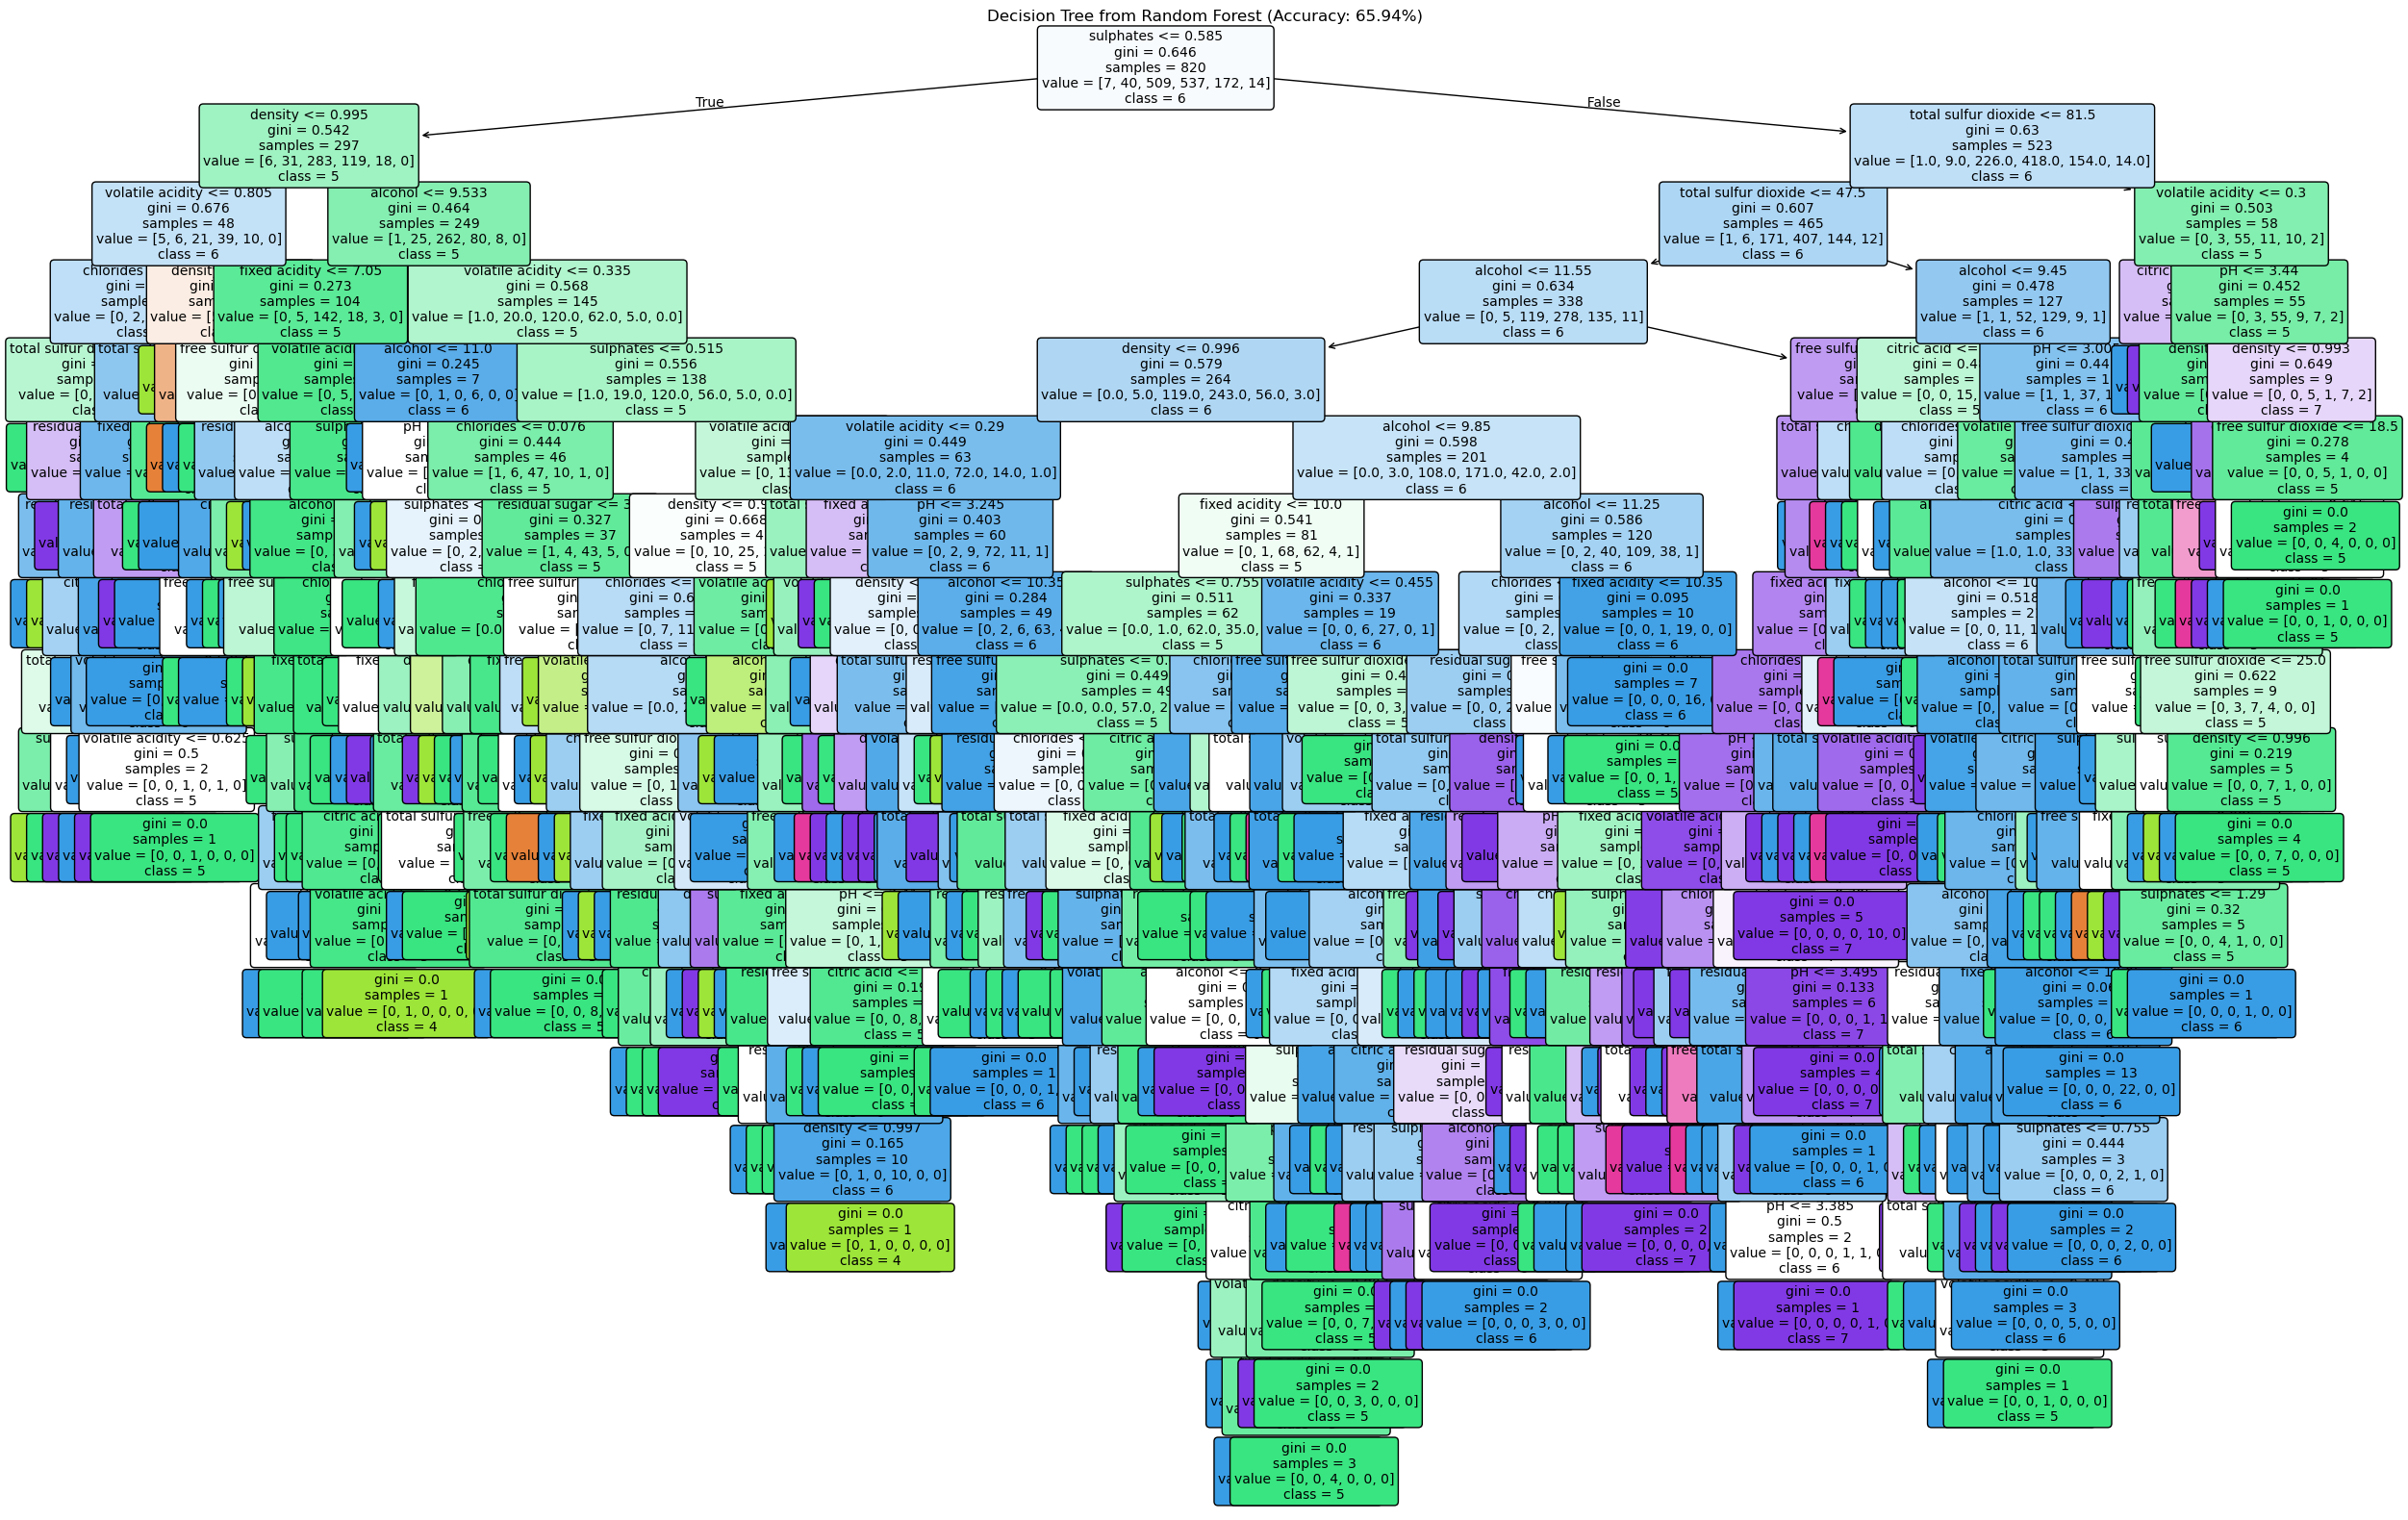

In [12]:
# Step 9: Visualize 1 Decision Tree from Random Forest
plt.figure(figsize=(30, 20))
plot_tree(
    model.estimators_[0],  # First tree from the forest
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    rounded=True,
    fontsize=10
)
plt.title(f"Decision Tree from Random Forest (Accuracy: {accuracy*100:.2f}%)")
plt.show()

In [13]:
new_data = np.array([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])
predicted_quality = model.predict(new_data)
print(f"\n✅ Predicted Quality for Manual Input: {predicted_quality[0]}")


✅ Predicted Quality for Manual Input: 5


D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
# Step 11: Manual Prediction for Multiple Samples
new_samples = np.array([
    [7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],
    [6.2, 0.52, 0.04, 2.0, 0.076, 25.0, 67.0, 0.9948, 3.38, 0.55, 10.0]
])
multi_preds = model.predict(new_samples)
print(f"\n✅ Predicted Qualities for Multiple Inputs: {multi_preds}")


✅ Predicted Qualities for Multiple Inputs: [5 5]


D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
# Step 12: Min-Max Values of Each Feature
min_max_df = X.agg(['min', 'max']).transpose().reset_index()
min_max_df.columns = ['Feature', 'Min Value', 'Max Value']
print("\n✅ Min and Max Values for Each Feature:\n")
print(min_max_df)


✅ Min and Max Values for Each Feature:

                 Feature  Min Value  Max Value
0          fixed acidity    4.60000   15.90000
1       volatile acidity    0.12000    1.58000
2            citric acid    0.00000    1.00000
3         residual sugar    0.90000   15.50000
4              chlorides    0.01200    0.61100
5    free sulfur dioxide    1.00000   72.00000
6   total sulfur dioxide    6.00000  289.00000
7                density    0.99007    1.00369
8                     pH    2.74000    4.01000
9              sulphates    0.33000    2.00000
10               alcohol    8.40000   14.90000


In [17]:
for n in [10, 50, 100, 200, 300, 500, 1000, 2000, 5000]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Trees: {n} → Accuracy: {acc*100:.2f}%")


Trees: 10 → Accuracy: 63.12%
Trees: 50 → Accuracy: 64.06%
Trees: 100 → Accuracy: 65.94%
Trees: 200 → Accuracy: 65.62%
Trees: 300 → Accuracy: 65.94%
Trees: 500 → Accuracy: 65.00%
Trees: 1000 → Accuracy: 65.94%
Trees: 2000 → Accuracy: 65.31%
Trees: 5000 → Accuracy: 65.62%
